<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/pose_estimation_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Click the link above to add and add the folder to your Google Drive

In [ ]:
https://drive.google.com/drive/folders/1RmfA89TojIlQoS_rbL-UhRyz69_H4uLN?usp=sharing

In [ ]:
!git clone https://github.com/mattsmiths/biol470.git

Cloning into 'biol470'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 26 (delta 7), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 37.28 MiB | 33.10 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Click to import libraries
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [ ]:
#@title Enter the name of the folder where your videos are saved
Folder_Name = 'Smith_matt' # @param {type:"string"}

grab_files = glob.glob('/content/drive/MyDrive/BIOL470/Activity_1/'+Folder_Name+'/*')
for element in grab_files:
  print(element)


/content/drive/MyDrive/BIOL470/Activity_1/Smith_matt/juggle_2.avi
/content/drive/MyDrive/BIOL470/Activity_1/Smith_matt/juggle_3.avi
/content/drive/MyDrive/BIOL470/Activity_1/Smith_matt/juggle_1.avi


In [ ]:
#text = 'value' # @param {type:"string"}
#dropdown = '1st option' # @param ["1st option", "2nd option", "3rd option"]


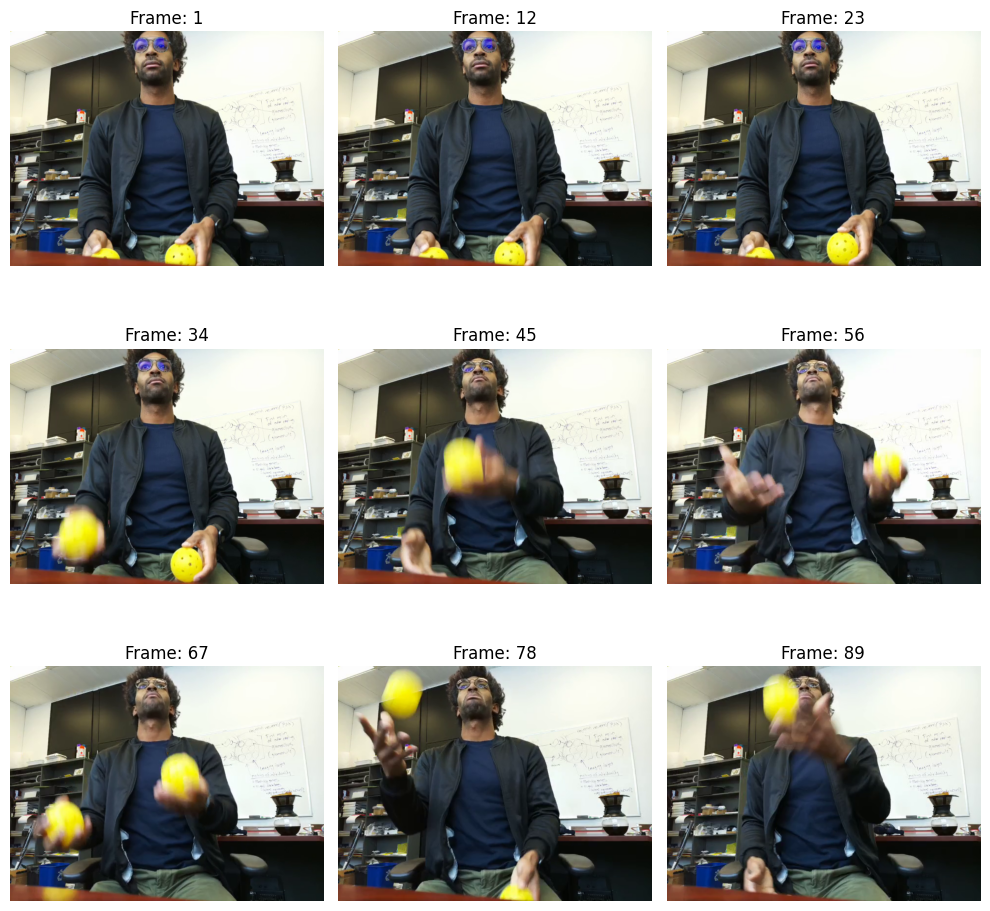

In [ ]:
#@title Visualize a video!
fig,ax = plt.subplots(3,3,figsize=(10,10))

# open the video!
vid1 = cv.VideoCapture(grab_files[0])
readIn,image = vid1.read()
ax[0,0].imshow(image)
cnt = 0

for xx in range(0,3):
  for yy in range(0,3):

    # read in the next image from the video
    readIn,image = vid1.read()
    cnt+=1

    # plot image sample in new window
    ax[xx,yy].imshow(image[:,:,::-1])

    # turn axis labels off and add a title
    ax[xx,yy].axis('off')
    ax[xx,yy].set_title('Frame: %s'%cnt)

    # skip 10 frames
    [vid1.read() for ele in range(0,10)]
    cnt+=10
plt.tight_layout()
plt.show()

# Now to apply some POSE ESTIMATION

In [ ]:
#@title load the machine learning library
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('/content/biol470/week1/yolo11m-pose.pt')


0: 480x640 1 person, 1321.6ms
Speed: 7.6ms preprocess, 1321.6ms inference, 27.4ms postprocess per image at shape (1, 3, 480, 640)


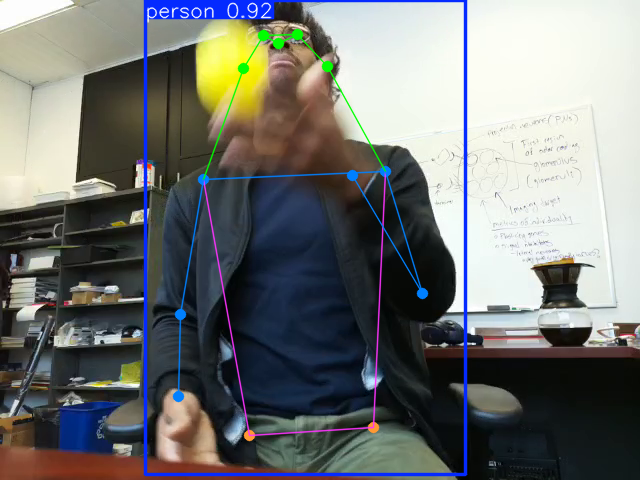

In [ ]:
results = model(image)
results[0].show()

In [ ]:
#@title Create and list all behavior nodes
fKey = {'Nose':[], 'Left Eye':[], 'Right Eye':[],'Left Ear':[],'Right Ear':[],'Left Shoulder':[],'Right Shoulder':[],'Left Elbow':[],'Right Elbow':[],'Left Wrist':[],'Right Wrist':[],'Left Hip':[],'Right Hip':[],'Left Knee':[],'Right Knee':[],'Left Ankle':[],'Right':[]}
kpoints = list(fKey.keys())

for ele in kpoints:
  print(ele)

Nose
Left Eye
Right Eye
Left Ear
Right Ear
Left Shoulder
Right Shoulder
Left Elbow
Right Elbow
Left Wrist
Right Wrist
Left Hip
Right Hip
Left Knee
Right Knee
Left Ankle
Right


In [ ]:
#@title Create a video with the pose overlay (for video 1)
videoIndex = 0

vid1 = cv.VideoCapture(grab_files[videoIndex])
#YOLO()
tempName = grab_files[videoIndex].split('/')[-1]
vidOut1 = cv.VideoWriter('/content/overlay_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
vidOut2 = cv.VideoWriter('/content/pose_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
for ele in range(0,10):
  readIn,image = vid1.read()
  results = model(image)
  out = results[0].plot()
  vidOut1.write(out.astype(np.uint8))

  results[0].orig_img = np.zeros((np.shape(results[0].orig_img)))
  test = results[0].plot()
  vidOut2.write(test.astype(np.uint8))

  temp = results[0].keypoints.data[0].cpu()
  for ind,ele in enumerate(kpoints):
    fKey[ele].append(temp[ind].cpu())

  [vid1.read() for ele in range(0,10)]


vid1.release()
vidOut1.release()
vidOut2.release()


speedOut= {}
for ind,ele in enumerate(kpoints):
  speedOut[ele] = []
  for ind2 in range(1,len(fKey[ele])):
    speedOut[ele].append(np.diff(fKey[ele][ind2][:2]-fKey[ele][ind2-1][:2])[0])


dd = pd.DataFrame.from_dict(speedOut)
tt = tempName.split('.')[0]
dd.to_csv(tt+'.csv')


0: 480x640 1 person, 1068.4ms
Speed: 3.0ms preprocess, 1068.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1058.7ms
Speed: 2.9ms preprocess, 1058.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1052.3ms
Speed: 2.8ms preprocess, 1052.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1620.4ms
Speed: 2.9ms preprocess, 1620.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1678.6ms
Speed: 4.1ms preprocess, 1678.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1631.3ms
Speed: 4.0ms preprocess, 1631.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1056.0ms
Speed: 2.9ms preprocess, 1056.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 1048.6ms
Speed: 3.5ms preprocess, 1048.6ms inference, 1.0ms postproc

In [ ]:
#@title Create a video with the pose overlay (for video 2)
videoIndex = 1

vid1 = cv.VideoCapture(grab_files[videoIndex])
#YOLO()
tempName = grab_files[videoIndex].split('/')[-1]
vidOut1 = cv.VideoWriter('/content/overlay_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
vidOut2 = cv.VideoWriter('/content/pose_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
for ele in range(0,10):
  readIn,image = vid1.read()
  results = model(image)
  out = results[0].plot()
  vidOut1.write(out.astype(np.uint8))

  results[0].orig_img = np.zeros((np.shape(results[0].orig_img)))
  test = results[0].plot()
  vidOut2.write(test.astype(np.uint8))

  temp = results[0].keypoints.data[0].cpu()
  for ind,ele in enumerate(kpoints):
    fKey[ele].append(temp[ind].cpu())

  [vid1.read() for ele in range(0,10)]


vid1.release()
vidOut1.release()
vidOut2.release()


speedOut= {}
for ind,ele in enumerate(kpoints):
  speedOut[ele] = []
  for ind2 in range(1,len(fKey[ele])):
    speedOut[ele].append(np.diff(fKey[ele][ind2][:2]-fKey[ele][ind2-1][:2]))


dd = pd.DataFrame.from_dict(speedOut)
tt = tempName.split('.')[0]
dd.to_csv(tt+'.csv')

In [ ]:
#@title Create a video with the pose overlay (for video 2)
videoIndex = 2

vid1 = cv.VideoCapture(grab_files[videoIndex])
#YOLO()
tempName = grab_files[videoIndex].split('/')[-1]
vidOut1 = cv.VideoWriter('/content/overlay_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
vidOut2 = cv.VideoWriter('/content/pose_%s'%tempName,cv.VideoWriter_fourcc('M','J','P','G'), 25, (640,480))
for ele in range(0,10):
  readIn,image = vid1.read()
  results = model(image)
  out = results[0].plot()
  vidOut1.write(out.astype(np.uint8))

  results[0].orig_img = np.zeros((np.shape(results[0].orig_img)))
  test = results[0].plot()
  vidOut2.write(test.astype(np.uint8))

  temp = results[0].keypoints.data[0].cpu()
  for ind,ele in enumerate(kpoints):
    fKey[ele].append(temp[ind].cpu())

  [vid1.read() for ele in range(0,10)]


vid1.release()
vidOut1.release()
vidOut2.release()


speedOut= {}
for ind,ele in enumerate(kpoints):
  speedOut[ele] = []
  for ind2 in range(1,len(fKey[ele])):
    speedOut[ele].append(np.diff(fKey[ele][ind2][:2]-fKey[ele][ind2-1][:2]))


dd = pd.DataFrame.from_dict(speedOut)
tt = tempName.split('.')[0]
dd.to_csv(tt+'.csv')